команда: 13  
Участники: Цыгляев Владислав, Габдрахманов Рустам, Лебедев Иван

# Источники

1) https://habr.com/ru/companies/skillfactory/articles/565232/
2) https://education.yandex.ru/handbook/ml/article/svyortochnye-nejroseti
3) https://habr.com/ru/companies/beelinekz/articles/646485/
4) https://en.wikipedia.org/wiki/LeNet
5) https://id-lab.ru/posts/developers/funkcii/
6) https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/
7) https://habr.com/ru/companies/ods/articles/714670/
8) https://habr.com/ru/companies/ods/articles/713920/

## Системы классификации изображений на основе сверточных нейронных сетей.  

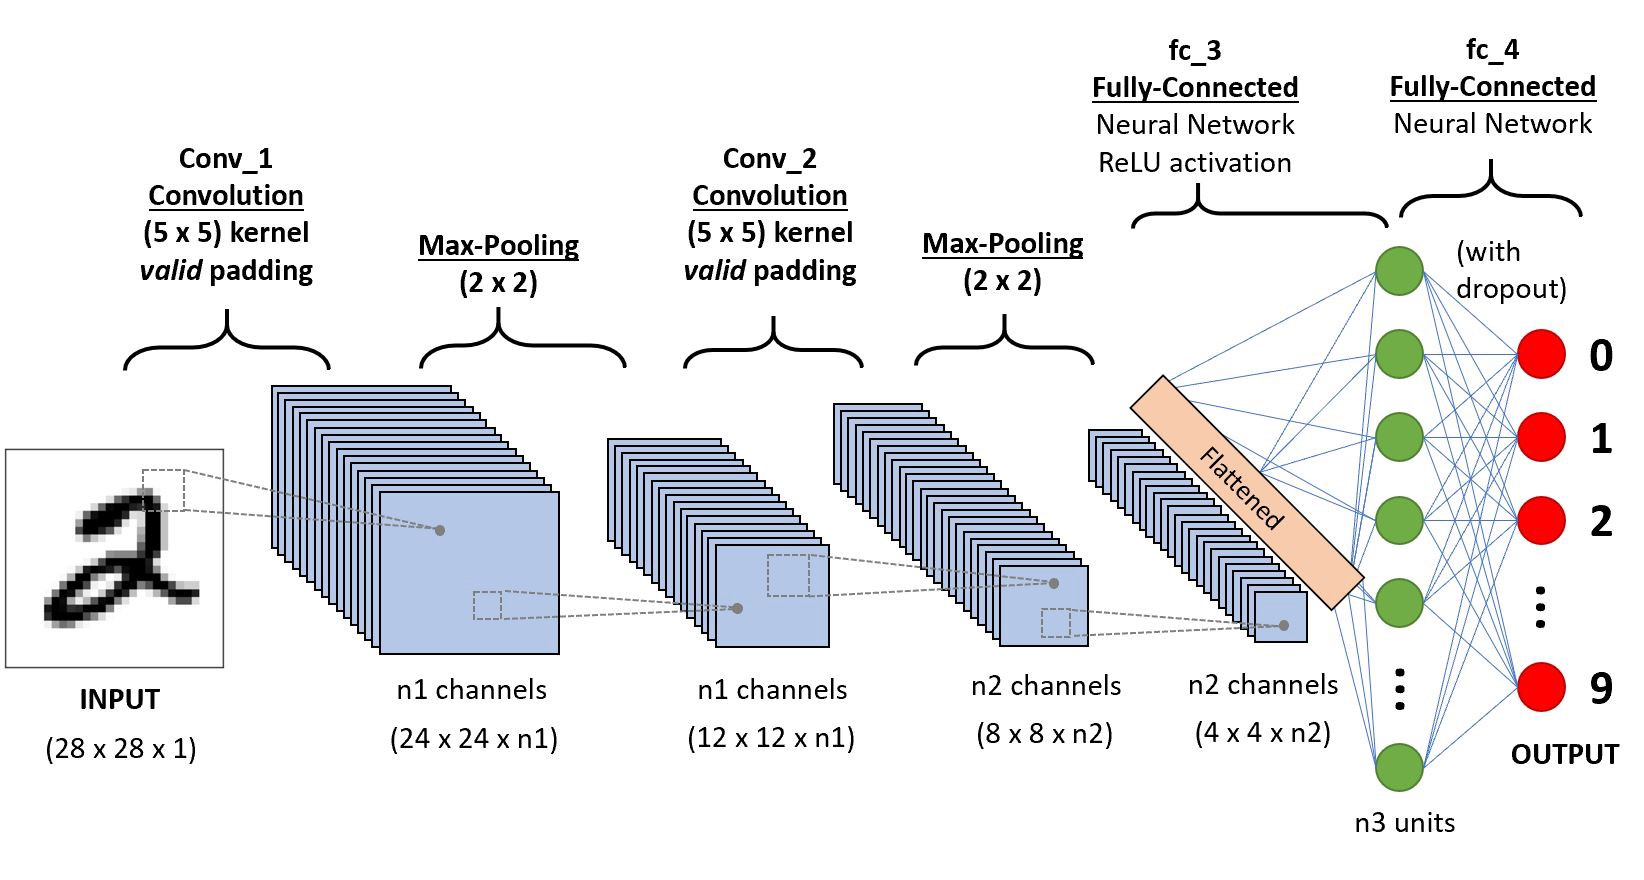

## Теория

Свёрточная нейронная сеть (ConvNet/CNN) — это алгоритм глубокого обучения, который может принимать входное изображение, присваивать важность (изучаемые веса и смещения) аспектам или объектам изображении и отличать одно от другого.
в отличии от полносвязных нейронных сетей сети CNN способны с успехом схватывать пространственные и временные зависимости в изображении через применение соответствующих фильтров. Роль CNN заключается в том, чтобы привести изображения в форму, которую легче обрабатывать, без потери признаков, имеющих решающее значение в получении хорошего прогноза. Это важно при разработке архитектуры, которая не только хорошо изучает функции, но и масштабируется для массивных наборов данных.

In [ ]:
from IPython.display import Image
print("Слой свёртки — ядро")
Image(url='https://habrastorage.org/getpro/habr/upload_files/a5f/c3d/078/a5fc3d078f98465601ac65f5be909300.gif')

Слой свёртки — ядро


Определенные ядра фильруют опредленные признаки и закономерности. При продвижении вглубь сети признаки изменяются от низкоуровневых(границы) до высокоуровневых(объекты).

Подобно свёрточному слою, слой объединения отвечает за уменьшение размера свёрнутого объекта в пространстве. Это делается для уменьшения необходимой при обработке данных вычислительной мощности за счёт сокращения размерности. Кроме того, это полезно для извлечения доминирующих признаков, которые являются вращательными и позиционными инвариантами, тем самым позволяя поддерживать процесс эффективного обучения модели.

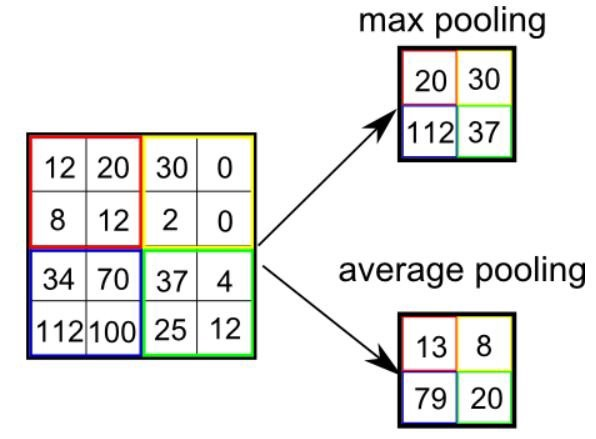

# Датасет MNIST

Датасет MNIST содержит рукописные цифры. Загрузим датасет и создадим DataLoader-ы.

In [ ]:
import os
from torchvision.datasets import MNIST
import torchvision.transforms as tfs
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])

# install for train and test
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)
valid_dataloader = DataLoader(val_dataset, batch_size=100, shuffle=False, num_workers=2)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 135MB/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 43.7MB/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 28.6MB/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.73MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

def show_images(images, labels, num_images=10):
    images = images[:num_images]  # Берем первые N изображений
    labels = labels[:num_images]  # Берем соответствующие метки

    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for idx, (img, label) in enumerate(zip(images, labels)):
        img = img.squeeze(0).numpy()  # Убираем лишний канал и преобразуем в numpy
        axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(f'Label: {label.item()}')
        axes[idx].axis('off')
    plt.show()

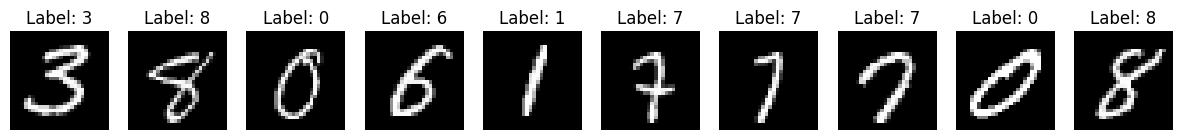

In [ ]:
show_images(images, labels, num_images=10)


### Напишем свою CNN
Наша нейронная сеть (LeNet) будет состоять из
* Свёртки 3x3 (1 карта на входе, 6 на выходе) с активацией ReLU;
* MaxPooling-а 2x2;
* Свёртки 3x3 (6 карт на входе, 16 на выходе) с активацией ReLU;
* MaxPooling-а 2x2;
* Уплощения (nn.Flatten);
* Полносвязного слоя со 120 нейронами и активацией ReLU;
* Полносвязного слоя с 84 нейронами и активацией ReLU;
* Выходного слоя из 10 нейронов.




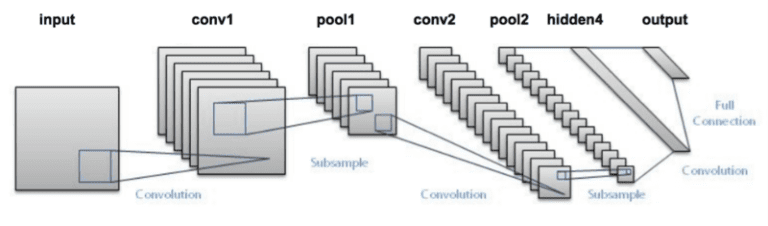

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square conv kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

Будем использовать кроосэнтропию для многоклассовой классификации. В качестве метрики качества будем использовать accuracy, accuracy = correct_preds/all_preds

Кроссэнтропия

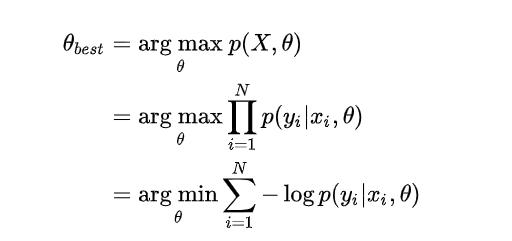

In [ ]:
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_dataloader, "valid": valid_dataloader}

Обучим CNN

In [ ]:
max_epochs = 10
accuracy = {"train": [], "valid": []}
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            if k == "train":
              model.train()
              optimizer.zero_grad()
              outp = model(x_batch)
            else:
              model.eval()
              with torch.no_grad():
                outp = model(x_batch)
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = len(preds)
            epoch_correct += correct.item()
            epoch_all += all
            if k == "train":
              loss = criterion(outp, y_batch)
              loss.backward()
              optimizer.step()

        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.8957166666666667
Loader: valid. Accuracy: 0.9704
Epoch: 2
Loader: train. Accuracy: 0.9741
Loader: valid. Accuracy: 0.9821
Epoch: 3
Loader: train. Accuracy: 0.9809333333333333
Loader: valid. Accuracy: 0.9837
Epoch: 4
Loader: train. Accuracy: 0.9851666666666666
Loader: valid. Accuracy: 0.9858
Epoch: 5
Loader: train. Accuracy: 0.9872833333333333
Loader: valid. Accuracy: 0.9856
Epoch: 6
Loader: train. Accuracy: 0.9904333333333334
Loader: valid. Accuracy: 0.9883
Epoch: 7
Loader: train. Accuracy: 0.9907
Loader: valid. Accuracy: 0.9864
Epoch: 8
Loader: train. Accuracy: 0.9926333333333334
Loader: valid. Accuracy: 0.9881
Epoch: 9
Loader: train. Accuracy: 0.9936833333333334
Loader: valid. Accuracy: 0.9873
Epoch: 10
Loader: train. Accuracy: 0.9951166666666666
Loader: valid. Accuracy: 0.9898


In [ ]:
lenet_accuracy = accuracy["valid"]

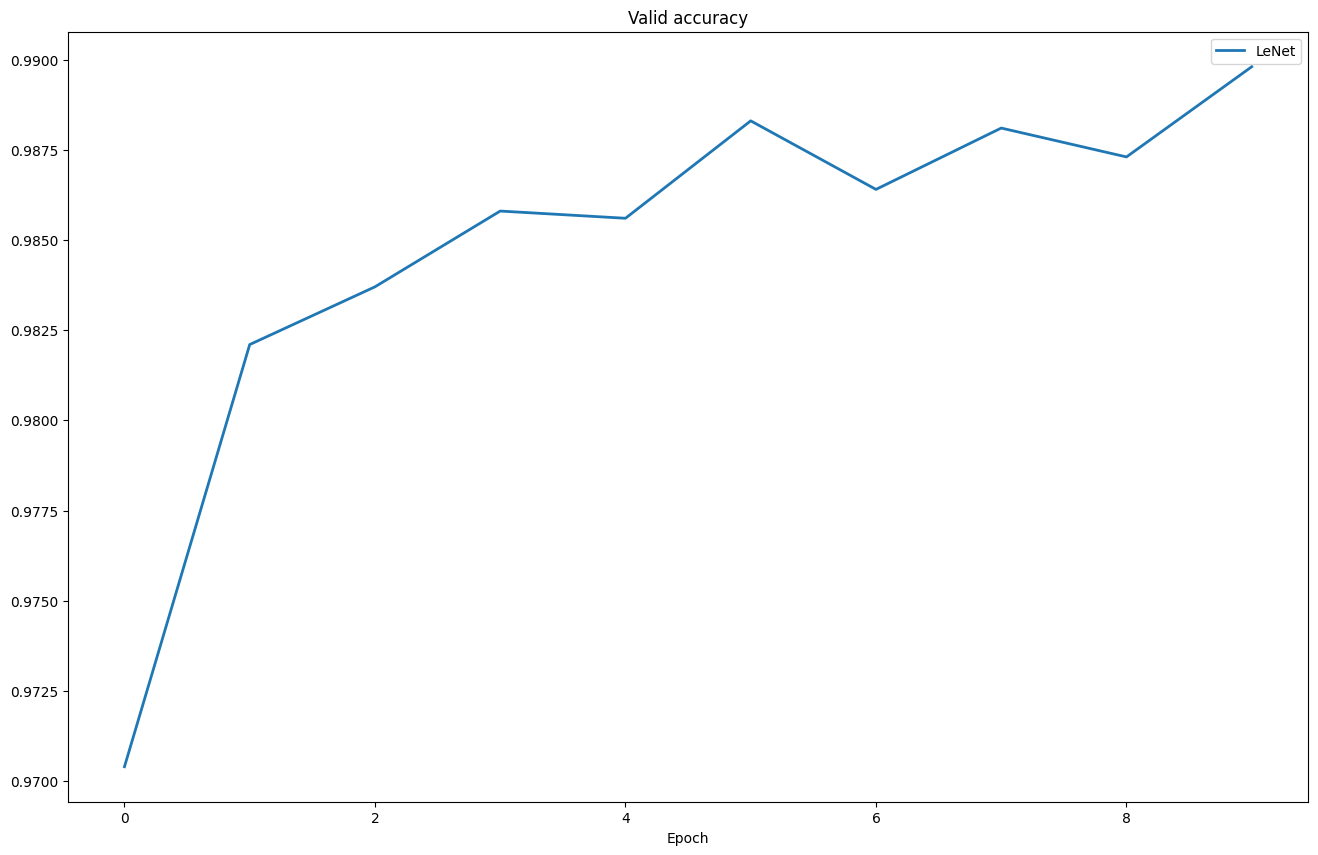

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Valid accuracy")
plt.plot(range(max_epochs), lenet_accuracy, label="LeNet", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()

# Вывод

Была реализована простейшая система классификации изображений на основе
сверточных нейронных сетей. Также произведено обучения нейронной сети и представлены полученные метрики.